In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/q4-sektor-industri-2021/_and_Ratio_Q4_Sektor_Industri_-_2021.csv
/kaggle/input/daftar-emiten-sektor-industri-mar-2022/Daftar_Emiten_Sektor_Industri_Mar_2022.csv


***
# CLUSTERING EMITEN SEKTOR INDUSTRI Q4 2021 -  HAJAR HANIFAH 
***

Tujuan penelitian ini adalah melakukan clustering terhadap data seluruh emiten saham di sektor industri Q4 2021. 
Adapun beberapa step yang akan dilakukan adalah 
1. load data
2. Data cleansing
3. Display scatter plot
4. Clustering Data
5. Menentukan Outliers
6. Mencari K-Means
7. Mengukur Elbow Point 
8. Menampilkan Result data clustering

***
# 1. Import Libraries
***

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

***
# 2. Exploratory Data Analysis
***


# 2.1 Data Understanding

Data yang diambil merupakan data statictical financial ratio Q4 2021 untuk seluruh emiten di sektor Industri.

Data di dapatkan dari [IDX - Laporan Statistic Financial Data Ratio](https://www.idx.co.id/data-pasar/laporan-statistik/digital-statistic-beta/financial-data-ratio?q=eyJ5ZWFyIjoiMjAyMSIsIm1vbnRoIjpudWxsLCJxdWFydGVyIjo0LCJ0eXBlIjoieWVhcmx5In0=)


# 2.2 Understanding The Table

* **Emiten :** Pihak yang melakukan penawaran umum, yaitu penawaran efek yang dilakukan oleh emiten untuk menjual efek kepada masyarakat berdasarkan tata cara yang diatur dalam peraturan undang-undang yang berlaku. 
* **Sales Growth :** Kenaikan jumlah penjualan dari tahun ke tahun atau dari waktu ke waktu.
* **ROA (Return of Asset) :** Indikator untuk menunjukkan seberapa untuk sebuah perusahaan dibandingkan dengan total asetnya. 
* **DER (Debt to Equity Ratio) :** Rasio hutang terhadap ekuitas atau rasio keuangan yang membandingkan jumlah hutang dengan ekuitas

Keterangan rasio yang akan digunakan : 
- **DER =** Total Uang / Total Ekuitas
- **Return on Asset =** Laba setelah pajak / Total Asset 
- **Sales Growth =** (penjualan periode 2021 - penjualan periode 2020)/ penjualan periode 2020

# 2.3 Load Data

In [3]:
data = pd.read_csv('../input/q4-sektor-industri-2021/_and_Ratio_Q4_Sektor_Industri_-_2021.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emiten        47 non-null     object 
 1   sales 2021    47 non-null     float64
 2   sales 2020    47 non-null     float64
 3   sales growth  47 non-null     float64
 4   DER           47 non-null     float64
 5   ROA           47 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.3+ KB


In [4]:
data.describe()

,sales 2021,sales 2020,sales growth,DER,ROA
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,6653.687665,5343.909943,0.218826,1.694468,0.015319
std,25483.077941,19908.467330,0.381154,3.066189,0.129763
min,30.558459,30.558459,-0.278979,-2.860000,-0.610000
25%,193.383703,176.165542,-0.026248,0.500000,-0.020000
50%,1032.823356,738.469893,0.156018,0.730000,0.020000
75%,1942.316044,1795.811816,0.349266,1.750000,0.060000
max,167402.000000,130349.000000,1.440089,16.330000,0.310000


In [5]:
display(data)

,emiten,sales 2021,sales 2020,sales growth,DER,ROA
0,AMFG,3482.418000,2628.143000,0.325049,1.32,0.06
1,AMIN,126.410014,89.529619,0.411935,1.14,-0.05
2,APII,196.576104,191.183788,0.028205,0.49,0.05
3,ARKA,49.519687,40.490458,0.222996,3.97,-0.02
4,ARNA,1885.434087,1612.593631,0.169194,0.51,0.21
5,CAKK,192.804684,148.833787,0.295436,0.88,0.03
6,CCSI,309.023588,172.835230,0.787966,0.31,0.11
7,CTTH,63.356990,76.576843,-0.172635,2.28,-0.05
8,HEXA,2558.360495,1521.052930,0.681967,1.38,0.12
9,IKBI,1607.298202,959.708893,0.674777,0.67,0.01


# 2.4 Data Cleansing

In [6]:
data.drop(["sales 2021","sales 2020"], axis=1, inplace=True)

# 2. Scatter Plot

<Figure size 1440x1440 with 0 Axes>

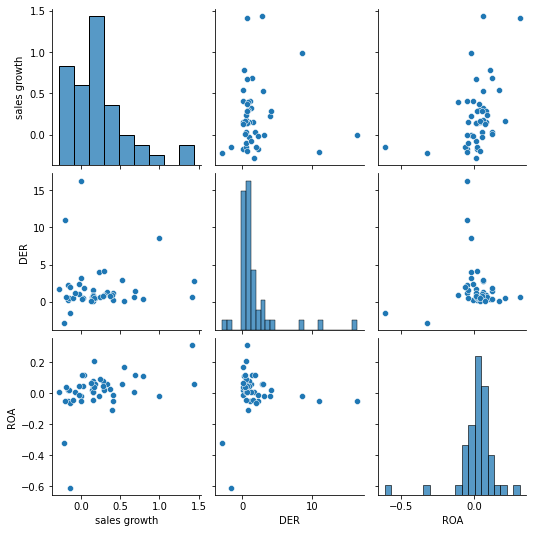

In [7]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, vars = data.columns[1:6]);

***
# 3. CLUSTERING
***


# 3.1 Load Data

**Add new Column on Dataset**

In [8]:
data["category"] = pd.NaT

In [9]:
data.describe()

,sales growth,DER,ROA
count,47.000000,47.000000,47.000000
mean,0.218826,1.694468,0.015319
std,0.381154,3.066189,0.129763
min,-0.278979,-2.860000,-0.610000
25%,-0.026248,0.500000,-0.020000
50%,0.156018,0.730000,0.020000
75%,0.349266,1.750000,0.060000
max,1.440089,16.330000,0.310000


In [10]:
display(data)

,emiten,sales growth,DER,ROA,category
0,AMFG,0.325049,1.32,0.06,NaT
1,AMIN,0.411935,1.14,-0.05,NaT
2,APII,0.028205,0.49,0.05,NaT
3,ARKA,0.222996,3.97,-0.02,NaT
4,ARNA,0.169194,0.51,0.21,NaT
5,CAKK,0.295436,0.88,0.03,NaT
6,CCSI,0.787966,0.31,0.11,NaT
7,CTTH,-0.172635,2.28,-0.05,NaT
8,HEXA,0.681967,1.38,0.12,NaT
9,IKBI,0.674777,0.67,0.01,NaT


# 3.2 Scatter Plot

<AxesSubplot:xlabel='emiten', ylabel='sales growth'>

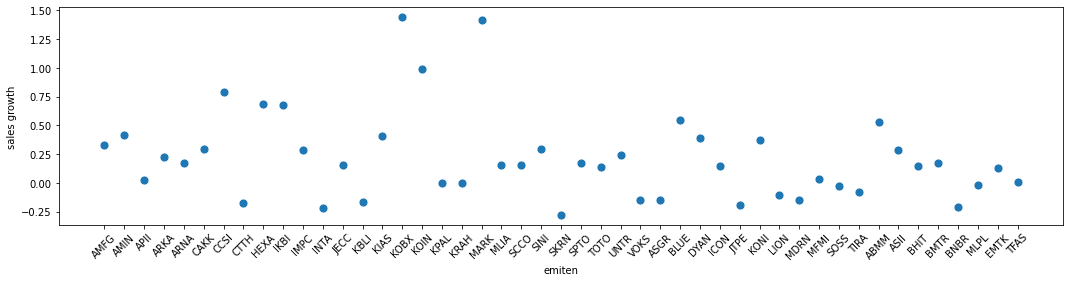

In [11]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='sales growth', 
                data=data, s=80)

<AxesSubplot:xlabel='emiten', ylabel='DER'>

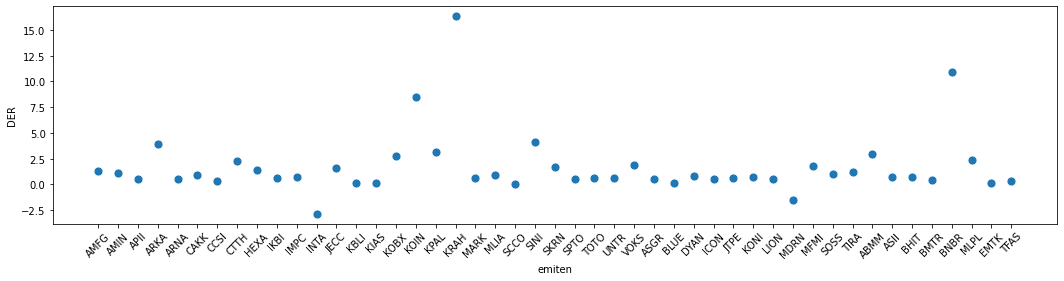

In [12]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='DER', 
                data=data, s=80)

<AxesSubplot:xlabel='emiten', ylabel='ROA'>

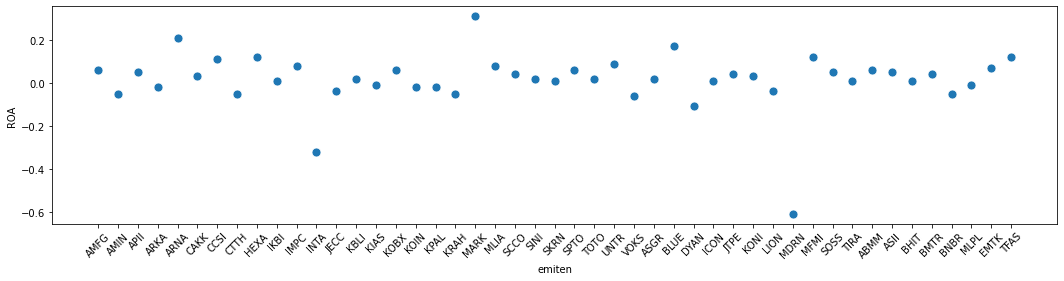

In [13]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='ROA', 
                data=data, s=80)

# 3.3 Outlier

In [14]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([False] * len(data))
for col in ['sales growth']:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 47
Jumlah baris setelah memfilter outlier: 45


In [15]:
data.describe()

,sales growth,DER,ROA
count,45.000000,45.000000,45.000000
mean,0.165089,1.692889,0.007778
std,0.287181,3.126935,0.124606
min,-0.278979,-2.860000,-0.610000
25%,-0.031751,0.490000,-0.020000
50%,0.155350,0.730000,0.020000
75%,0.295436,1.680000,0.060000
max,0.989152,16.330000,0.210000


# 3.4 Standarisasi Fitur

In [16]:

feats = ['sales growth', 'DER','ROA']
X = data[feats].values
y = data['category'].values

from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler().fit_transform(X)
new_dataframe = pd.DataFrame(data = standardscaler, columns = feats)
new_dataframe.describe()

,sales growth,DER,ROA
count,4.500000e+01,4.500000e+01,4.500000e+01
mean,1.159566e-16,-1.282924e-16,4.687608e-17
std,1.011300e+00,1.011300e+00,1.011300e+00
min,-1.563773e+00,-1.472476e+00,-5.013854e+00
25%,-6.931675e-01,-3.890332e-01,-2.254431e-01
50%,-3.429683e-02,-3.114134e-01,9.919495e-02
75%,4.590127e-01,-4.168469e-03,4.238330e-01
max,2.901912e+00,4.733872e+00,1.641226e+00


In [17]:
new_dataframe

,sales growth,DER,ROA
0,0.563293,-0.120598,0.423833
1,0.869260,-0.178813,-0.468922
2,-0.482034,-0.389033,0.342673
3,0.203918,0.736453,-0.225443
4,0.014453,-0.382565,1.641226
5,0.459013,-0.262901,0.180354
6,2.193442,-0.447248,0.829630
7,-1.189285,0.189881,-0.468922
8,1.820167,-0.101193,0.910790
9,1.794848,-0.330818,0.018035


# 3.5 K-Means

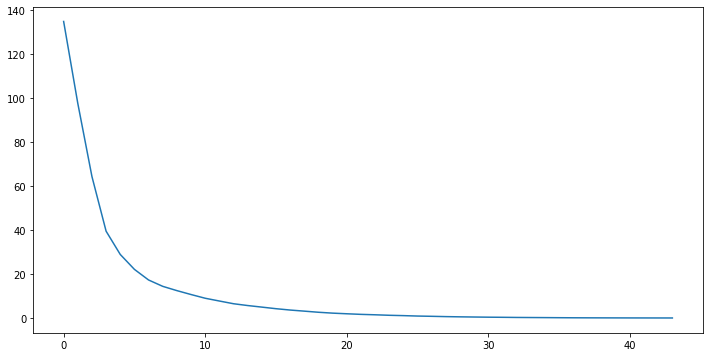

In [18]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 45):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_dataframe.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 6 cluster (n_cluster = 6)

# 3.6 Pilih Jumlah Cluster

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=12, random_state=0)
kmeans.fit(new_dataframe.values)

KMeans(n_clusters=6, n_init=12, random_state=0)

In [20]:
new_dataframe['target'] = y
new_dataframe['fit'] = kmeans.labels_

# 3.7 Plot Cluster

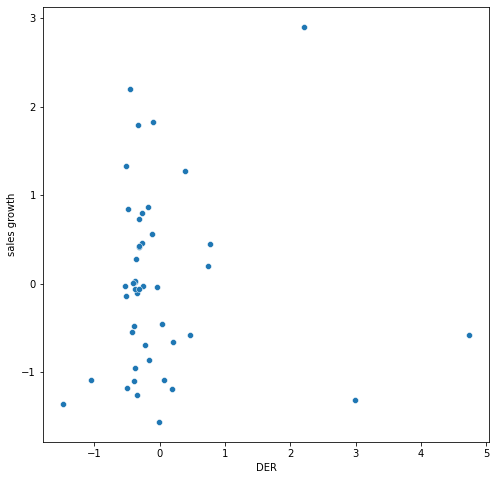

In [21]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='sales growth', hue=new_dataframe.target.to_list(), data=new_dataframe);

In [22]:
new_dataframe.head(6)

,sales growth,DER,ROA,target,fit
0,0.563293,-0.120598,0.423833,NaT,0
1,0.869260,-0.178813,-0.468922,NaT,0
2,-0.482034,-0.389033,0.342673,NaT,1
3,0.203918,0.736453,-0.225443,NaT,0
4,0.014453,-0.382565,1.641226,NaT,0
5,0.459013,-0.262901,0.180354,NaT,0


Assign fit ke kolom category untuk membuat color indicator

In [23]:
new_dataframe.insert(0,"category",np.nan,True)
new_dataframe.loc[new_dataframe['fit'] == 0, 'category'] = 2
new_dataframe.loc[new_dataframe['fit'] == 1, 'category'] = 4
new_dataframe.loc[new_dataframe['fit'] == 2, 'category'] = 1
new_dataframe.loc[new_dataframe['fit'] == 3, 'category'] = 0
new_dataframe.loc[new_dataframe['fit'] == 4, 'category'] = 3
new_dataframe.loc[new_dataframe['fit'] == 5, 'category'] = 5
new_dataframe['category'] = new_dataframe['category'].astype(int)
new_dataframe.head(6)

,category,sales growth,DER,ROA,target,fit
0,2,0.563293,-0.120598,0.423833,NaT,0
1,2,0.869260,-0.178813,-0.468922,NaT,0
2,4,-0.482034,-0.389033,0.342673,NaT,1
3,2,0.203918,0.736453,-0.225443,NaT,0
4,2,0.014453,-0.382565,1.641226,NaT,0
5,2,0.459013,-0.262901,0.180354,NaT,0


Adjust column name to (St.) = Standardized

In [24]:
new_dataframe.drop(["fit","target"], axis=1, inplace=True)
new_dataframe.columns = ['category', 'sales growth (St.)','DER (St.)','ROA (St.)']
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            45 non-null     int64  
 1   sales growth (St.)  45 non-null     float64
 2   DER (St.)           45 non-null     float64
 3   ROA (St.)           45 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.5 KB


# 3.7.1 3D Scatter Plot

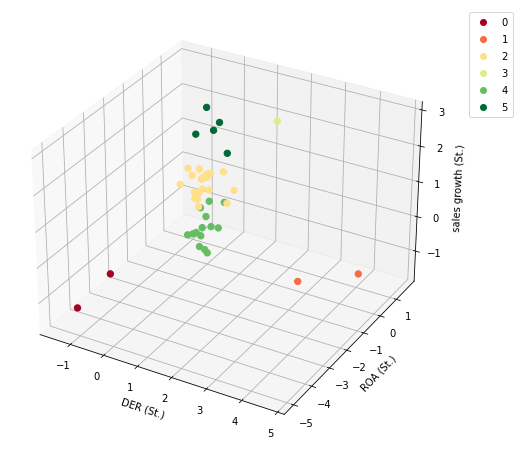

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_dataframe['DER (St.)']
y = new_dataframe['ROA (St.)']
z = new_dataframe['sales growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("sales growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_dataframe['category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# 3.7.2 X vs Z View

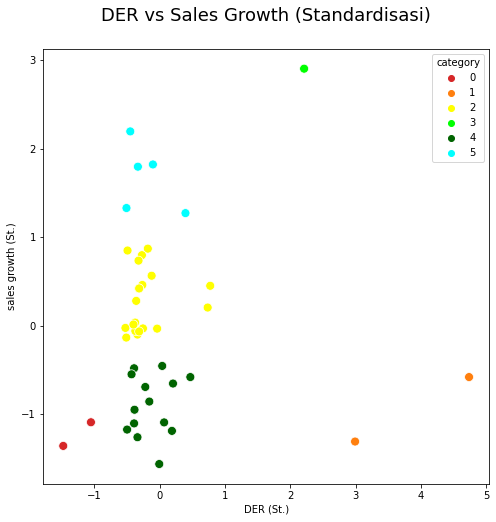

In [26]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen",
          5:"cyan"}

sns.scatterplot(x='DER (St.)', y='sales growth (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3.7.3 Y vs Z View

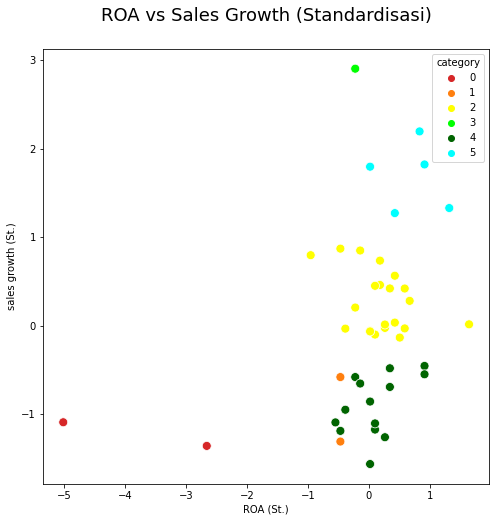

In [27]:
sns.scatterplot(x='ROA (St.)', y='sales growth (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("ROA vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3.7.4 X vs Y View

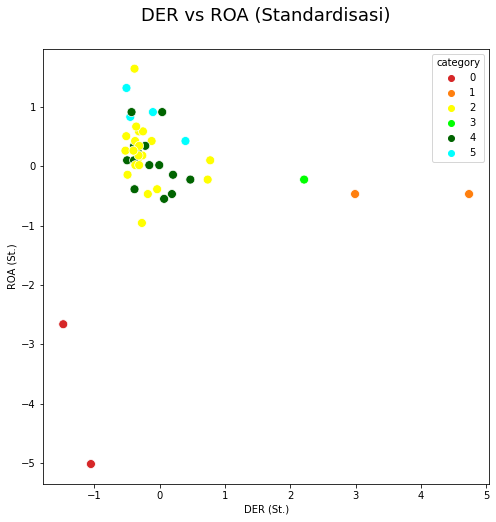

In [28]:
sns.scatterplot(x='DER (St.)', y='ROA (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs ROA (Standardisasi)", fontsize=18, y=1.05)
plt.show()

***
# 4. Export Result
***

In [29]:
display(data)

,emiten,sales growth,DER,ROA,category
0,AMFG,0.325049,1.32,0.06,NaT
1,AMIN,0.411935,1.14,-0.05,NaT
2,APII,0.028205,0.49,0.05,NaT
3,ARKA,0.222996,3.97,-0.02,NaT
4,ARNA,0.169194,0.51,0.21,NaT
5,CAKK,0.295436,0.88,0.03,NaT
6,CCSI,0.787966,0.31,0.11,NaT
7,CTTH,-0.172635,2.28,-0.05,NaT
8,HEXA,0.681967,1.38,0.12,NaT
9,IKBI,0.674777,0.67,0.01,NaT


Adjust Initial Data (data):
Delete outlier YELO and other column other than emiten, DER, ROA,sales growth.

In [30]:
# drop these row indexes
# from dataFrame
index_names = data[ data['emiten'] == 'AMFG' ].index
data.drop(index_names, inplace = True)
data.reset_index(drop=True, inplace=True)
data.drop(["category"], axis=1, inplace=True)

Concat **Industry Emiten List** dftemp, Result new_dataframe and Initial Data data

In [31]:
dftemp = pd.read_csv('../input/daftar-emiten-sektor-industri-mar-2022/Daftar_Emiten_Sektor_Industri_Mar_2022.csv')
df = pd.concat([dftemp, new_dataframe, data], axis=1)
df.head(5)

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),emiten,sales growth,DER,ROA
0,AMFG,Asahimas Flat Glass Tbk,2.0,0.563293,-0.120598,0.423833,AMIN,0.411935,1.14,-0.05
1,AMIN,PT Ateliers Mecaniques D Indonesie Tbk.,2.0,0.869260,-0.178813,-0.468922,APII,0.028205,0.49,0.05
2,APII,PT Arita Prima Indonesia Tbk.,4.0,-0.482034,-0.389033,0.342673,ARKA,0.222996,3.97,-0.02
3,ARKA,PT Arkha Jayanti Persada Tbk.,2.0,0.203918,0.736453,-0.225443,ARNA,0.169194,0.51,0.21
4,ARNA,Arwana Citramulia Tbk,2.0,0.014453,-0.382565,1.641226,CAKK,0.295436,0.88,0.03


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emiten              47 non-null     object 
 1   stock name          47 non-null     object 
 2   category            45 non-null     float64
 3   sales growth (St.)  45 non-null     float64
 4   DER (St.)           45 non-null     float64
 5   ROA (St.)           45 non-null     float64
 6   emiten              44 non-null     object 
 7   sales growth        44 non-null     float64
 8   DER                 44 non-null     float64
 9   ROA                 44 non-null     float64
dtypes: float64(7), object(3)
memory usage: 3.8+ KB


In [33]:
df.to_csv('result.csv', index = False)

***
# 5. Get Centroid
***

In [34]:
kmeans.cluster_centers_

array([[ 0.26882007, -0.21931691,  0.19581341],
       [-0.90086515, -0.13006958,  0.08760074],
       [-0.94550432,  3.86226622, -0.46892159],
       [-1.22548797, -1.26063846, -3.83704106],
       [ 2.9019117 ,  2.21122907, -0.22544307],
       [ 1.68139272, -0.19757106,  0.69977529]])

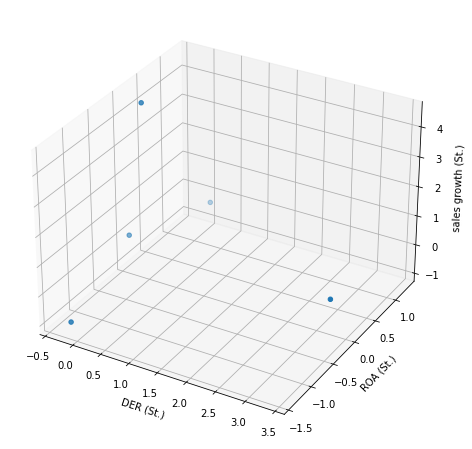

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("sales growth (St.)")
ax.scatter(x, y, z)
plt.show()

***
# 6. Cluster Description
***

In [36]:
df[df['category'] == 5].describe() 

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.0,1.681393,-0.197571,0.699775,0.292277,1.052000,-0.004000
std,0.0,0.383417,0.366584,0.495671,0.305090,0.690051,0.076681
min,5.0,1.270534,-0.505463,0.018035,-0.172635,0.670000,-0.110000
25%,5.0,1.327972,-0.447248,0.423833,0.284026,0.720000,-0.050000
50%,5.0,1.794848,-0.330818,0.829630,0.284260,0.730000,0.010000
75%,5.0,1.820167,-0.101193,0.910790,0.390956,0.860000,0.050000
max,5.0,2.193442,0.396867,1.316588,0.674777,2.280000,0.080000


In [37]:
#Highly Positively Impacted
df[df['category'] == 4].describe() 

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,14.0,14.000000,14.000000,14.000000,13.000000,13.000000,13.000000
mean,4.0,-0.900865,-0.130070,0.087601,0.203837,2.110769,-0.007692
std,0.0,0.341128,0.295318,0.448904,0.280826,4.480825,0.190094
min,4.0,-1.563773,-0.495760,-0.550081,-0.148689,-1.550000,-0.610000
25%,4.0,-1.157072,-0.387416,-0.205153,-0.031751,0.180000,-0.010000
50%,4.0,-0.904223,-0.186898,0.058615,0.174716,0.700000,0.030000
75%,4.0,-0.599620,0.062940,0.322384,0.405940,1.380000,0.060000
max,4.0,-0.455741,0.471253,0.910790,0.681967,16.330000,0.170000


In [38]:
#Positively Impacted
df[df['category'] == 3].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,1.0,1.000000,1.000000,1.000000,1.0,1.00,1.00
mean,3.0,2.901912,2.211229,-0.225443,0.0,3.15,-0.02
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.0,2.901912,2.211229,-0.225443,0.0,3.15,-0.02
25%,3.0,2.901912,2.211229,-0.225443,0.0,3.15,-0.02
50%,3.0,2.901912,2.211229,-0.225443,0.0,3.15,-0.02
75%,3.0,2.901912,2.211229,-0.225443,0.0,3.15,-0.02
max,3.0,2.901912,2.211229,-0.225443,0.0,3.15,-0.02


In [39]:
#Neutral Impacted
df[df['category'] == 2].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2.0,0.268820,-0.219317,0.195813,0.126972,1.541429,0.013333
std,0.0,0.344298,0.344622,0.516253,0.322097,2.993878,0.099415
min,2.0,-0.135263,-0.521634,-0.955879,-0.278979,-2.860000,-0.320000
25%,2.0,-0.031943,-0.372862,0.018035,-0.145459,0.460000,-0.020000
50%,2.0,0.203918,-0.314648,0.180354,0.146302,0.590000,0.020000
75%,2.0,0.459013,-0.253199,0.423833,0.244389,1.140000,0.040000
max,2.0,0.869260,0.775263,1.641226,0.989152,10.940000,0.210000


In [40]:
#Negatively Impacted
df[df['category'] == 1].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
mean,1.0,-0.945504,3.862266,-0.468922,0.067637,1.620000,0.03500
std,0.0,0.514983,1.232636,0.000000,0.124991,1.004092,0.06364
min,1.0,-1.309652,2.990661,-0.468922,-0.020745,0.910000,-0.01000
25%,1.0,-1.127578,3.426464,-0.468922,0.023446,1.265000,0.01250
50%,1.0,-0.945504,3.862266,-0.468922,0.067637,1.620000,0.03500
75%,1.0,-0.763430,4.298069,-0.468922,0.111828,1.975000,0.05750
max,1.0,-0.581356,4.733872,-0.468922,0.156018,2.330000,0.08000


In [41]:
#Highly Negatively Impacted
df[df['category'] == 0].describe()


,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.0,-1.225488,-1.260638,-3.837041,0.095511,1.700000,0.040000
std,0.0,0.188909,0.299583,1.664265,0.084625,0.169706,0.113137
min,0.0,-1.359067,-1.472476,-5.013854,0.035671,1.580000,-0.040000
25%,0.0,-1.292277,-1.366557,-4.425447,0.065591,1.640000,0.000000
50%,0.0,-1.225488,-1.260638,-3.837041,0.095511,1.700000,0.040000
75%,0.0,-1.158699,-1.154720,-3.248635,0.125430,1.760000,0.080000
max,0.0,-1.091909,-1.048801,-2.660228,0.155350,1.820000,0.120000
